In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def inertia(X, centroids, labels):
    s = 0.0
    for i, x in enumerate(X):
        c = centroids[labels[i]]
        s += np.sum((x - c) ** 2)
    return s

def assign_labels(X, centroids):
    labels = np.zeros(len(X), dtype=int)
    for i, x in enumerate(X):
        dists = np.linalg.norm(x - centroids, axis=1)
        labels[i] = np.argmin(dists)
    return labels

def compute_centroids(X, labels, K):
    n_features = X.shape[1]
    centroids = np.zeros((K, n_features))
    for k in range(K):
        points = X[labels == k]
        if len(points) == 0:
            centroids[k] = X[random.randrange(len(X))]
        else:
            centroids[k] = points.mean(axis=0)
    return centroids

In [2]:
def kmeans_scratch(X, K=2, init_centroids=None, max_iter=100, tol=1e-4, verbose=True):
    n_samples, n_features = X.shape

    if init_centroids is None:
        idx = random.sample(range(n_samples), K)
        centroids = X[idx].astype(float)
    else:
        centroids = np.array(init_centroids, dtype=float)

    history = []

    for it in range(1, max_iter+1):
        labels = assign_labels(X, centroids)
        new_centroids = compute_centroids(X, labels, K)
        sse = inertia(X, new_centroids, labels)

        history.append({
            'iter': it,
            'centroids': new_centroids.copy(),
            'labels': labels.copy(),
            'sse': sse
        })

        if verbose:
            print(f"\nIteração {it}:")
            print("Centroides:", new_centroids.flatten().tolist())
            print(f"SSE: {sse:.4f}")
            for k in range(K):
                pts = X[labels == k].flatten().tolist()
                print(f"  Cluster {k+1}: {pts}")

        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            print(f"\nConvergiu (mudança {shift:.6f} < tol {tol}) na iteração {it}.")
            centroids = new_centroids
            break

        centroids = new_centroids

    return centroids, labels, history


In [3]:
# Dataset do artigo
data = np.array([2, 3, 4, 10, 11, 12, 20, 25, 30], dtype=float)
X = data.reshape(-1, 1)

# Centroides iniciais exatamente como no artigo
init_centroids = np.array([[4.0], [12.0]])

final_centroids, final_labels, history = kmeans_scratch(
    X,
    K=2,
    init_centroids=init_centroids,
    verbose=True
)

print("\n=== RESULTADO FINAL ===")
print("Centroides finais:", final_centroids.flatten().tolist())
for k in range(2):
    pts = X[final_labels == k].flatten().tolist()
    print(f"Cluster {k+1}: {pts}")



Iteração 1:
Centroides: [3.0, 18.0]
SSE: 348.0000
  Cluster 1: [2.0, 3.0, 4.0]
  Cluster 2: [10.0, 11.0, 12.0, 20.0, 25.0, 30.0]

Iteração 2:
Centroides: [4.75, 19.6]
SSE: 307.9500
  Cluster 1: [2.0, 3.0, 4.0, 10.0]
  Cluster 2: [11.0, 12.0, 20.0, 25.0, 30.0]

Iteração 3:
Centroides: [7.0, 25.0]
SSE: 150.0000
  Cluster 1: [2.0, 3.0, 4.0, 10.0, 11.0, 12.0]
  Cluster 2: [20.0, 25.0, 30.0]

Iteração 4:
Centroides: [7.0, 25.0]
SSE: 150.0000
  Cluster 1: [2.0, 3.0, 4.0, 10.0, 11.0, 12.0]
  Cluster 2: [20.0, 25.0, 30.0]

Convergiu (mudança 0.000000 < tol 0.0001) na iteração 4.

=== RESULTADO FINAL ===
Centroides finais: [7.0, 25.0]
Cluster 1: [2.0, 3.0, 4.0, 10.0, 11.0, 12.0]
Cluster 2: [20.0, 25.0, 30.0]


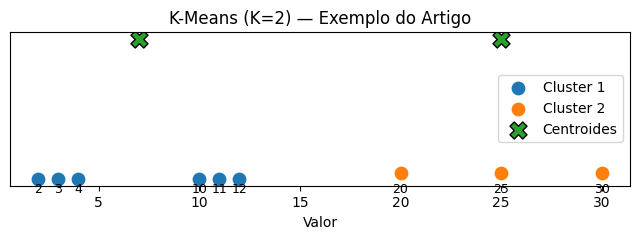

In [4]:
plt.figure(figsize=(8, 2))

for k in range(2):
    pts = X[final_labels == k].flatten()
    plt.scatter(pts, np.zeros_like(pts) + 0.02*k, label=f'Cluster {k+1}', s=80)

plt.scatter(
    final_centroids.flatten(),
    [0.5, 0.5],
    marker='X',
    s=150,
    edgecolor='k',
    label='Centroides'
)

for x in X.flatten():
    plt.text(x, -0.05, str(int(x)), ha='center', fontsize=9)

plt.yticks([])
plt.xlabel("Valor")
plt.title("K-Means (K=2) — Exemplo do Artigo")
plt.legend()
plt.show()
